In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("blackFriday_train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
pd.isnull(df).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


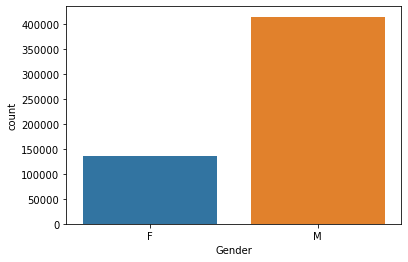

In [6]:
sns.countplot(x="Gender",data=df)

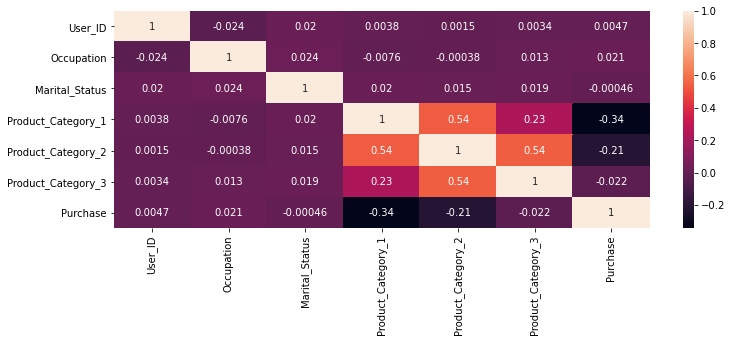

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [8]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df["Age"]=df["Age"].map({"0-17":0,"18-25":1,"26-35":2,"36-45":3,"46-50":4,"51-55":5,"55+":6})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df["Product_Category_2"].mode()

0    8.0
dtype: float64

In [12]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4,0,8,NaN,NaN,7969


In [14]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [15]:
k=df["Product_Category_2"].mean().round(2)

k

9.26

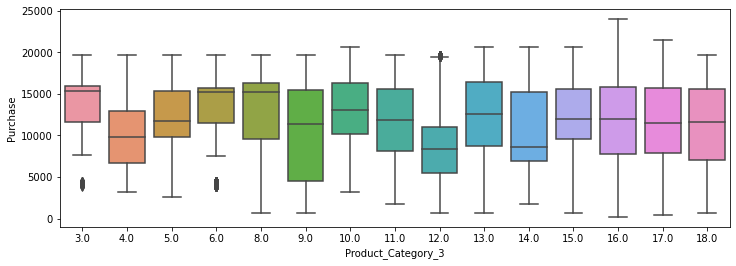

In [16]:
plt.figure(figsize=(12,4))
sns.boxplot(x="Product_Category_3",y="Purchase",data=df)
        

In [17]:
df[df["Product_Category_3"]==9].mode()["Product_Category_3"]

0    9.0
1    NaN
Name: Product_Category_3, dtype: float64

In [18]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(9)

In [19]:
pd.isnull(df).sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

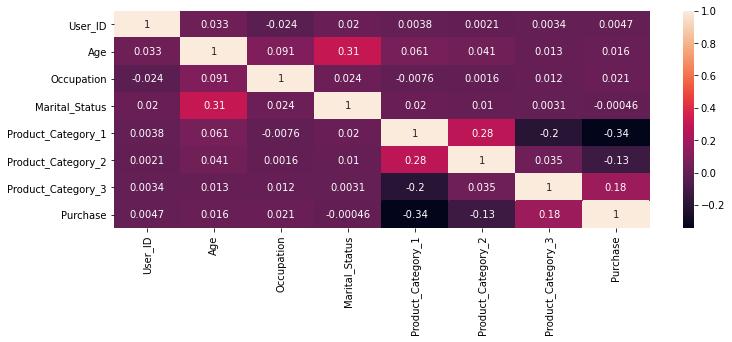

In [20]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,8.0,9.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,8.0,9.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,9.0,1057
4,1000002,P00285442,M,6,16,C,4,0,8,8.0,9.0,7969


In [24]:
df["Gender"]=df["Gender"].map({"M":1,"F":2})

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,2,0,10,A,2,0,3,8.0,9.0,8370
1,1000001,P00248942,2,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,2,0,10,A,2,0,12,8.0,9.0,1422
3,1000001,P00085442,2,0,10,A,2,0,12,14.0,9.0,1057
4,1000002,P00285442,1,6,16,C,4,0,8,8.0,9.0,7969


In [26]:
df.drop(["User_ID","Product_ID"],axis=1,inplace=True)

In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,2,0,10,A,2,0,3,8.0,9.0,8370
1,2,0,10,A,2,0,1,6.0,14.0,15200
2,2,0,10,A,2,0,12,8.0,9.0,1422
3,2,0,10,A,2,0,12,14.0,9.0,1057
4,1,6,16,C,4,0,8,8.0,9.0,7969


In [28]:
test=pd.read_csv("blackFriday_test.csv")

In [29]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [30]:
city=pd.get_dummies(df["City_Category"],drop_first=True)

In [31]:
df=pd.concat([df,city],axis=1)

In [32]:
df.drop("City_Category",axis=1,inplace=True)

In [33]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,2,0,10,2,0,3,8.0,9.0,8370,0,0
1,2,0,10,2,0,1,6.0,14.0,15200,0,0
2,2,0,10,2,0,12,8.0,9.0,1422,0,0
3,2,0,10,2,0,12,14.0,9.0,1057,0,0
4,1,6,16,4,0,8,8.0,9.0,7969,0,1


In [34]:
test["Gender"].unique()

array(['M', 'F'], dtype=object)

In [35]:
test["Gender"]=test["Gender"].map({"M":1,"F":2})

In [36]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,2,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,2,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,2,26-35,1,C,1,0,4,5.0,12.0


In [37]:
test["Age"].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [38]:
test["Age"]=test["Age"].map({"0-17":0,"18-25":1,"26-35":2,"36-45":3,"46-50":4,"51-55":5,"55+":6})

In [39]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,2,3,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,2,3,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,2,2,1,C,1,0,4,5.0,12.0


In [40]:
test["Stay_In_Current_City_Years"]=test["Stay_In_Current_City_Years"].str.replace("+"," ")

In [41]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,2,3,1,B,4,1,5,14.0,NaN
3,1000010,P00145342,2,3,1,B,4,1,4,9.0,NaN
4,1000011,P00053842,2,2,1,C,1,0,4,5.0,12.0


In [42]:
pd.isnull(test).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [43]:
test["Product_Category_2"].mean().round(2
                                     )

9.85

In [44]:
test["Product_Category_2"]=test["Product_Category_2"].fillna(9.84)

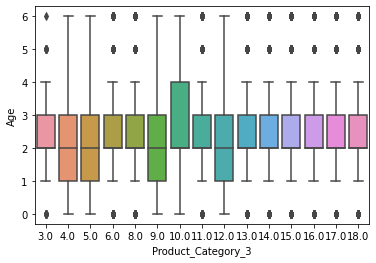

In [45]:
sns.boxplot(x="Product_Category_3",y="Age",data=test)

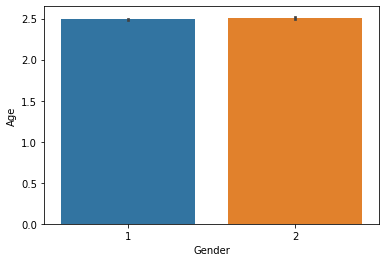

In [46]:
sns.barplot(x="Gender",y="Age",data=test)

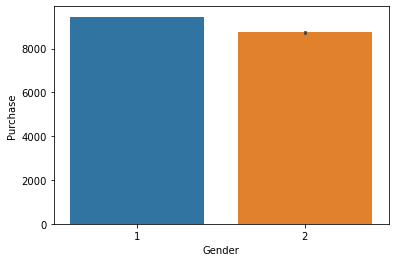

In [47]:
sns.barplot(x="Gender",y="Purchase",data=df)

In [48]:
pd.isnull(test).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            162562
dtype: int64

In [49]:
k=test["Product_Category_3"].mean().round(2)

In [50]:
test["Product_Category_3"]=test["Product_Category_3"].fillna(k)

In [51]:
test.drop(["User_ID","Product_ID"],axis=1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,B,2,1,1,11.00,12.67
1,1,2,17,C,0,0,3,5.00,12.67
2,2,3,1,B,4,1,5,14.00,12.67
3,2,3,1,B,4,1,4,9.00,12.67
4,2,2,1,C,1,0,4,5.00,12.00
...,...,...,...,...,...,...,...,...,...
233594,2,2,15,B,4,1,8,9.84,12.67
233595,2,2,15,B,4,1,5,8.00,12.67
233596,2,2,15,B,4,1,1,5.00,12.00
233597,2,4,1,C,4,0,10,16.00,12.67


In [52]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [53]:
X=df[['Gender', 'Age', 
        'Product_Category_1', 'Product_Category_2',
       'Product_Category_3',  'B', 'C']]

In [54]:
y=df["Purchase"]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [56]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [57]:
lm=LinearRegression()

In [58]:
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
pd.isnull(df).sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [60]:
import statsmodels.api as sm

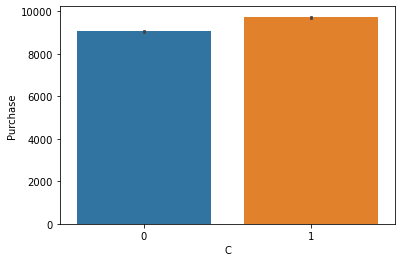

In [61]:
sns.barplot("C","Purchase",data=df)

In [62]:
X1=df[['Gender', 'Age', 
        'Product_Category_1', 'Product_Category_2',
       'Product_Category_3',  'B', 'C']]
y1=df["Purchase"]
X2 = sm.add_constant(X1)
est = sm.OLS(y1, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:18:31   Log-Likelihood:            -5.4271e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550060   BIC:                         1.085e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9901.7303     36

In [63]:
pd.DataFrame(lm.coef_,X.columns,columns=["Coefficients"])

,Coefficients
Gender,-488.335947
Age,105.604026
Product_Category_1,-390.885318
Product_Category_2,-54.452247
Product_Category_3,203.880687
B,170.861868
C,686.273645


In [64]:
city=pd.get_dummies(test["City_Category"],drop_first=True)

In [65]:
test=pd.concat([test,city],axis=1)

In [66]:
test.drop("City_Category",axis=1,inplace=True)

In [67]:
test["B"]

0         1
1         0
2         1
3         1
4         0
         ..
233594    1
233595    1
233596    1
233597    0
233598    1
Name: B, Length: 233599, dtype: uint8

In [68]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1000004,P00128942,1,4,7,2,1,1,11.0,12.67,1,0
1,1000009,P00113442,1,2,17,0,0,3,5.0,12.67,0,1
2,1000010,P00288442,2,3,1,4,1,5,14.0,12.67,1,0
3,1000010,P00145342,2,3,1,4,1,4,9.0,12.67,1,0
4,1000011,P00053842,2,2,1,1,0,4,5.0,12.00,0,1


In [69]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C'],
      dtype='object')

In [70]:
X_test=test[['Gender', 'Age', 
         'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C']]

In [71]:
predictions=lm.predict(X_test)

In [72]:
predictions

array([11574.67329589, 11423.81986805,  9253.83531176, ...,
       11065.24271966,  7811.52003203, 10240.39487823])

In [73]:
submission=pd.DataFrame({"Purchase":predictions,"User_ID":test["User_ID"],"Product_ID":test["Product_ID"]})

In [74]:
submission.to_csv("Blackfriday.csv",index=False)

In [153]:
submission[submission["Purchase"]<0].count()

Purchase      0
User_ID       0
Product_ID    0
dtype: int64